# **Lab 6**

### Question:
#### Using Cat and Dog Identification Dataset Implement CNN using Keras and Tensorflow.

In [29]:
# Imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split


In [2]:
tf.__version__

'2.8.0'

In [15]:
# Folder and file locations
IMAGE_FOLDER = 'Images'
IMAGE_TRAIN_FOLDER = 'Images/train'
FILENAMES = os.listdir(IMAGE_TRAIN_FOLDER)
FILENAMES[0:5]

['dog.8011.jpg',
 'cat.5077.jpg',
 'dog.7322.jpg',
 'cat.2718.jpg',
 'cat.10151.jpg']

In [16]:
# Generating dataframe of File paths and target variables 
targets = list()
full_paths = list()
train_cats_dir = list()
train_dogs_dir = list()

# finding each file's target
for file_name in FILENAMES:
    target = file_name.split(".")[0] # target name
    full_path = os.path.join(IMAGE_TRAIN_FOLDER, file_name)
    
    if(target == "dog"):
        train_dogs_dir.append(full_path)
    if(target == "cat"):
        train_cats_dir.append(full_path)
    
    full_paths.append(full_path)
    targets.append(target)

dataset = pd.DataFrame() # make dataframe
dataset['image_path'] = full_paths # file path
dataset['target'] = targets # file's target

In [17]:
dataset.head()

,image_path,target
0,Images/train/dog.8011.jpg,dog
1,Images/train/cat.5077.jpg,cat
2,Images/train/dog.7322.jpg,dog
3,Images/train/cat.2718.jpg,cat
4,Images/train/cat.10151.jpg,cat


In [19]:
dataset['target'].value_counts()

dog    12500
cat    12500
Name: target, dtype: int64

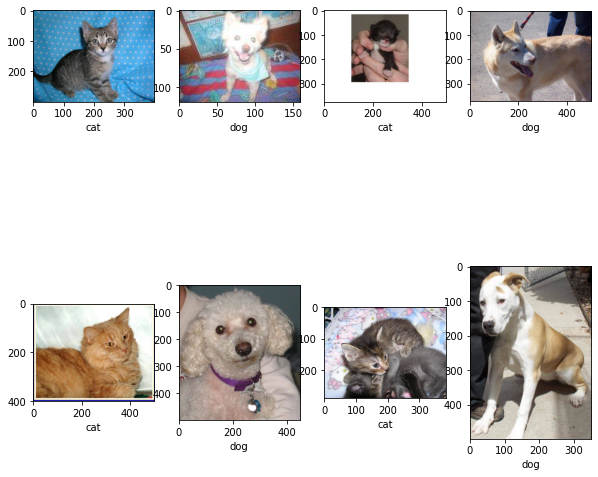

In [27]:
# Show Images
col = 4
row = 2
# Showing cat images in odd places and dog images in evan places
plt.figure(figsize=(10,10))
for i in range(row*col):
    plt.subplot(row,col,i+1)
    plt.grid(False)
    if i % 2  == 0:
        cat = image.imread(train_cats_dir[i])
        plt.imshow(cat)
        plt.xlabel('cat')
    else:
        dog = image.imread(train_dogs_dir[i])
        plt.imshow(dog)
        plt.xlabel('dog')
    
plt.show()

In [30]:
dataset_train, dataset_test = train_test_split(dataset, test_size=0.2, random_state= 0)

In [33]:
# Data Preprocessing
# Preprocessing the training data
training_data_generator = ImageDataGenerator(
                    rescale= 1./255,
                    shear_range= 0.2,
                    zoom_range= 0.2,
                    horizontal_flip= True)
training_set = training_data_generator.flow_from_dataframe(
                    dataframe = dataset_train,
                    x_col="image_path",
                    y_col="target",
                    target_size = (64,64),
                    batch_size = 32,
                    class_mode = 'binary'

)

Found 20000 validated image filenames belonging to 2 classes.


In [34]:
testing_data_generator = ImageDataGenerator(
                    rescale= 1./255)
testing_set = testing_data_generator.flow_from_dataframe(
                    dataframe = dataset_test,
                    x_col="image_path",
                    y_col="target",
                    target_size= (64,64),
                    batch_size= 32,
                    class_mode= 'binary'
)

Found 5000 validated image filenames belonging to 2 classes.


In [4]:
# Initilization of the CNN
cnn = tf.keras.models.Sequential()

2022-05-31 19:12:48.608096: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
# Part -1: Create first Calculation and pooling Layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size= 3, activation="relu", input_shape = [64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

In [6]:
# Part -2: Create 2nd Calculation and pooling Layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size= 3, activation="relu", input_shape = [64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

In [7]:
# Step -3: Flattening 
cnn.add(tf.keras.layers.Flatten())

In [8]:
# Step -4: FCNN with Relu
cnn.add(tf.keras.layers.Dense(units= 128,activation="relu"))

In [9]:
# Step - 5: FCNN with Sigmoid
cnn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [10]:
# Step - 7: Optimiser and Loss
cnn.compile(optimizer ='adam',loss ='binary_crossentropy',metrics = ['accuracy'])

In [11]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               8

In [36]:
# Training the Model
modelHistory=cnn.fit(training_set,
                       epochs=10,
                       validation_data=testing_set,
                       validation_steps=dataset_test.shape[0]/150,
                       steps_per_epoch=dataset_train.shape[0]/150)

Epoch 1/10
133/133 [==============================] - 44s 328ms/step - loss: 0.5052 - accuracy: 0.7558 - val_loss: 0.4754 - val_accuracy: 0.7895
Epoch 2/10
133/133 [==============================] - 43s 326ms/step - loss: 0.5077 - accuracy: 0.7521 - val_loss: 0.4797 - val_accuracy: 0.7583
Epoch 3/10
133/133 [==============================] - 44s 326ms/step - loss: 0.4881 - accuracy: 0.7708 - val_loss: 0.5056 - val_accuracy: 0.7564
Epoch 4/10
133/133 [==============================] - 47s 349ms/step - loss: 0.4764 - accuracy: 0.7715 - val_loss: 0.4981 - val_accuracy: 0.7592
Epoch 5/10
133/133 [==============================] - 46s 345ms/step - loss: 0.4799 - accuracy: 0.7682 - val_loss: 0.4492 - val_accuracy: 0.7748
Epoch 6/10
133/133 [==============================] - 42s 314ms/step - loss: 0.4804 - accuracy: 0.7775 - val_loss: 0.4544 - val_accuracy: 0.7969
Epoch 7/10
133/133 [==============================] - 41s 307ms/step - loss: 0.4679 - accuracy: 0.7799 - val_loss: 0.4362 - val_ac

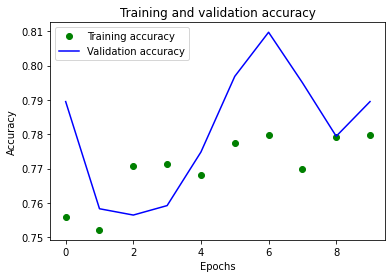

In [43]:
# PRedicting accuracy of model
acc = modelHistory.history['accuracy']
val_acc = modelHistory.history['val_accuracy']

epochs = range(len(acc))

plt.plot(epochs, acc, 'go', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
_ = plt.show()
